<a href="https://colab.research.google.com/github/ggrindstaff/Connectivity/blob/Automated-Earthwork-Detection/Colab_notebooks/PH_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ripser

Install ripser package, cython dependency already available

In [1]:
!pip install ripser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 604.8 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ripser: filename=ripser-0.6.4-cp310-cp310-linux_x86_64.whl size=754687 sha256=1578bc6a3fafa4b04030874db7c11a3e08240f2bb204f8e55dc5a2750ebf62ed
  Stored in directory: /root/.cache/pip/wheels/c5/f5/66/f41f708b049057431155934f74e20ca6001a085fcd2e615150
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18102 sha256=c496bbb6daadc5eee89dc305a39a8a9bce974000d3f5146b26a4a54f3883acaa
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built ripser hopcroftkarp


Code based on
https://ripser.scikit-tda.org/en/latest/notebooks/Lower%20Star%20Image%20Filtrations.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import PIL

from persim import plot_diagrams
from ripser import ripser, lower_star_img

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
%config InlineBackend.figure_format='retina'
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

Import data as numpy array

In [3]:
example_names = {1:'Smooth slope',
                 2:'Random noise',
                #  3:'Straight channel',
                #  4:'Branched channel',
                #  5:'Pit',
                 3:'Berm',
                 4:'Stock pond'}
data = {}
j=1
for i in [1,2,6,7]:
  data[j] = np.genfromtxt('https://raw.githubusercontent.com/ggrindstaff/Connectivity/master/Synthetics/example'+str(i)+'.csv',
                          dtype=float, delimiter=',',skip_header=True)
  j+=1


plot data

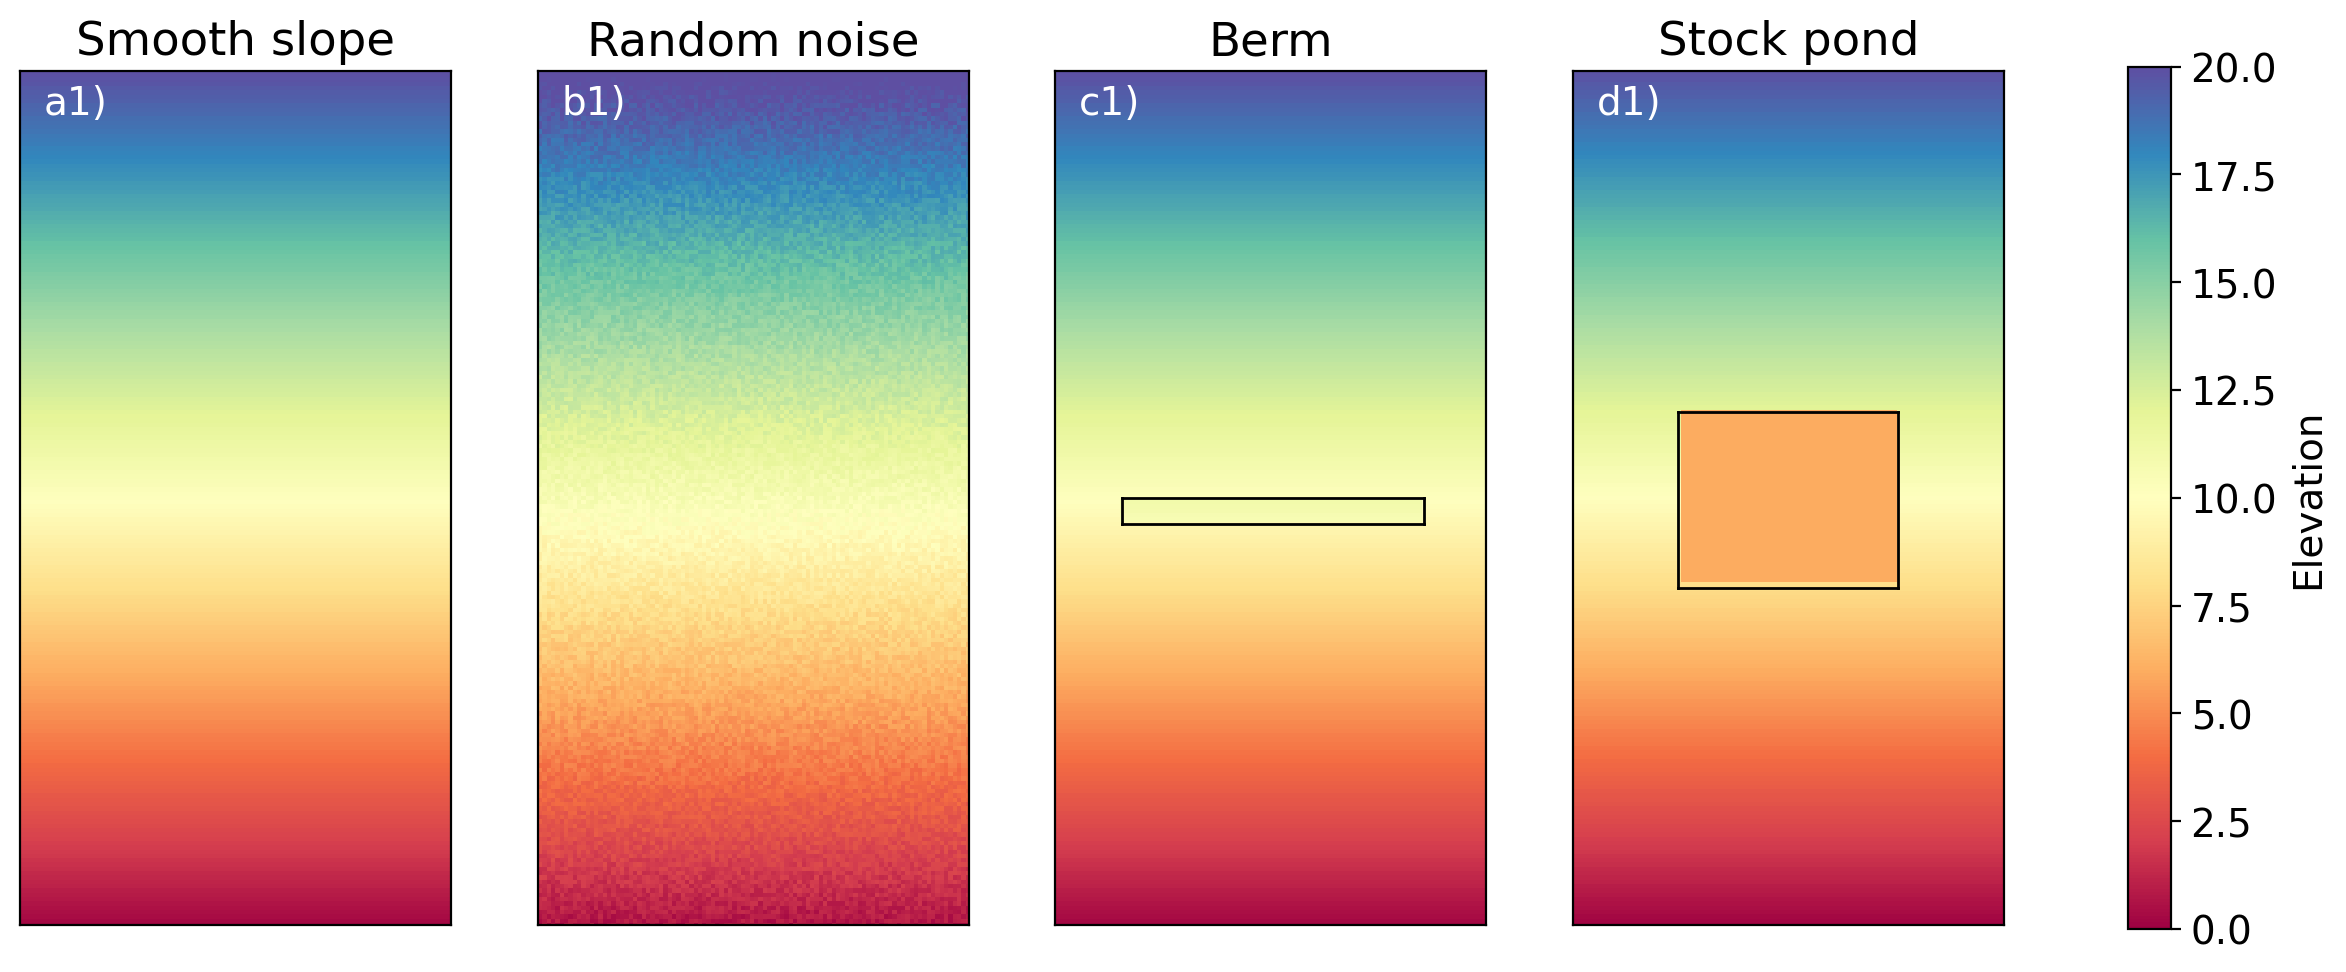

In [4]:
fig,axs = plt.subplots(1,len(data.keys()),
                       figsize = (4*len(data.keys()),8),sharey=True)
textlabel = ['a','b','c','d','e']
for i in range(len(data.keys())):
  ax = axs[i]
  d = data[i+1]
  im = ax.imshow(d,vmin = 0,vmax = 20,cmap='Spectral')
  ax.set_title(example_names[i+1])
  ax.set_ylim(198,0)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.text(5,10,textlabel[i]+'1)',fontsize=14,c='white')

# ax = axs[2]
# lw=1
# ax.plot([52,52],[200,20],c='k',lw=lw)
# ax.plot([47,47],[200,20],c='k',lw=lw)
# ax.plot([47,52],[20,20],c='k',lw=lw)

# ax = axs[3]
# ax.plot([52,52],[200,75],c='k',lw=lw)
# ax.plot([47,47],[200,75],c='k',lw=lw)
# ax.plot([15,47],[43,75],c='k',lw=lw)
# ax.plot([19,50],[39,70],c='k',lw=lw)
# ax.plot([15,19],[43,39],c='k',lw=lw)
# ax.plot([84,52],[43,75],c='k',lw=lw)
# ax.plot([81,50],[39,70],c='k',lw=lw)
# ax.plot([81,84],[39,43],c='k',lw=lw)

ax = axs[2]
lw=1
ax.plot([15,85],[99,99],c='k',lw=lw)
ax.plot([15,85],[105,105],c='k',lw=lw)
ax.plot([15,15],[99,105],c='k',lw=lw)
ax.plot([85,85],[99,105],c='k',lw=lw)

ax = axs[3]
ax.plot([24,75],[79,79],c='k',lw=lw)
ax.plot([24,75],[120,120],c='k',lw=lw)
ax.plot([24,24],[79,120],c='k',lw=lw)
ax.plot([75,75],[79,120],c='k',lw=lw)

cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.7)
cbar.set_label('Elevation')

Calculate persistence diagrams

In [5]:
dgms = {}
for i in data.keys():
  dgms[i] = lower_star_img(-data[i])
dgms_sub = {}
for i in data.keys():
  dgms_sub[i] = lower_star_img(data[i])

Text(0, 0.5, 'Death threshold')

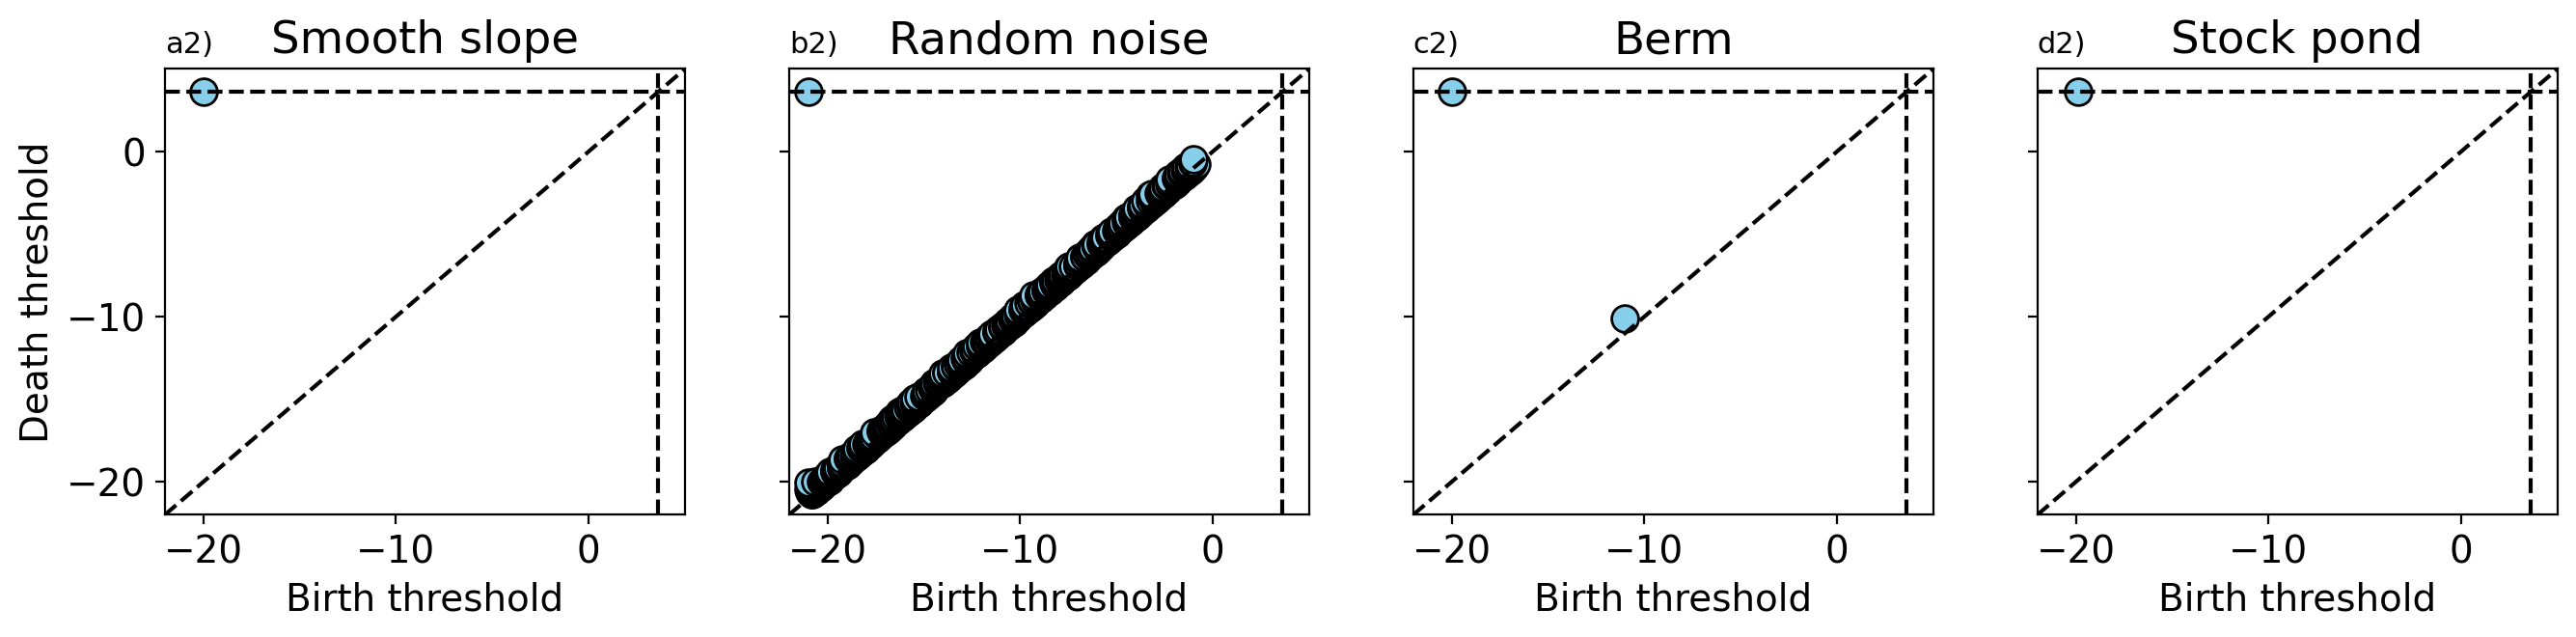

In [6]:
fig, axs = plt.subplots(1,len(data.keys()),figsize = (4*len(data.keys()),3.),
                        sharey=True)

def plot_ph(dgm,minalldata,maxalldata,ax,s,c):
  minalldata = abs(minalldata)
  maxalldata = abs(maxalldata)
  minplot = minalldata+0.25*maxalldata
  maxplot = -maxalldata*1.1
  birthtimes = np.array([p[0] for p in dgm])
  deathtimes = np.array([p[1] for p in dgm])
  ax.scatter(birthtimes,deathtimes,s=s,c=c,edgecolor = 'k')
  ax.axhline(maxalldata*0.18,c='k',ls='--')
  ax.axvline(maxalldata*0.18,c='k',ls='--')
  ax.plot([maxplot,minplot],[maxplot,minplot],c='k',ls='--')
  ax.set_xlim(maxplot,minplot)
  ax.set_ylim(maxplot,minplot)
  ax.set_xlabel('Birth threshold')
  birthinf = deathtimes[birthtimes > maxalldata*2]
  deathinf = birthtimes[deathtimes > maxalldata*2]
  ax.scatter([maxalldata*0.18]*len(birthinf),
             birthinf,s=s,c=c,edgecolor = 'k')
  ax.scatter(deathinf,[maxalldata*0.18]*len(deathinf),
             s=s,c=c,edgecolor = 'k')



for i in range(len(dgms.keys())):
  ax = axs[i]
  plot_ph(dgms[i+1],0,20,ax,100,'skyblue')
  # ax.set_xticks([-20,-15,-10,-5,0,3.6])
  # ax.set_yticks([-20,-15,-10,-5,0,3.6])
  # ax.set_xticklabels(['20','15','10','5','0',r"$\infty$"])
  # ax.set_yticklabels(['20','15','10','5','0',r"$\infty$"])
  ax.set_title(example_names[i+1])
  ax.text(-22,6,textlabel[i]+'2)',fontsize=11,)

axs[0].set_ylabel('Death threshold')

Text(12, 3.25, 'Sub level set filtration')

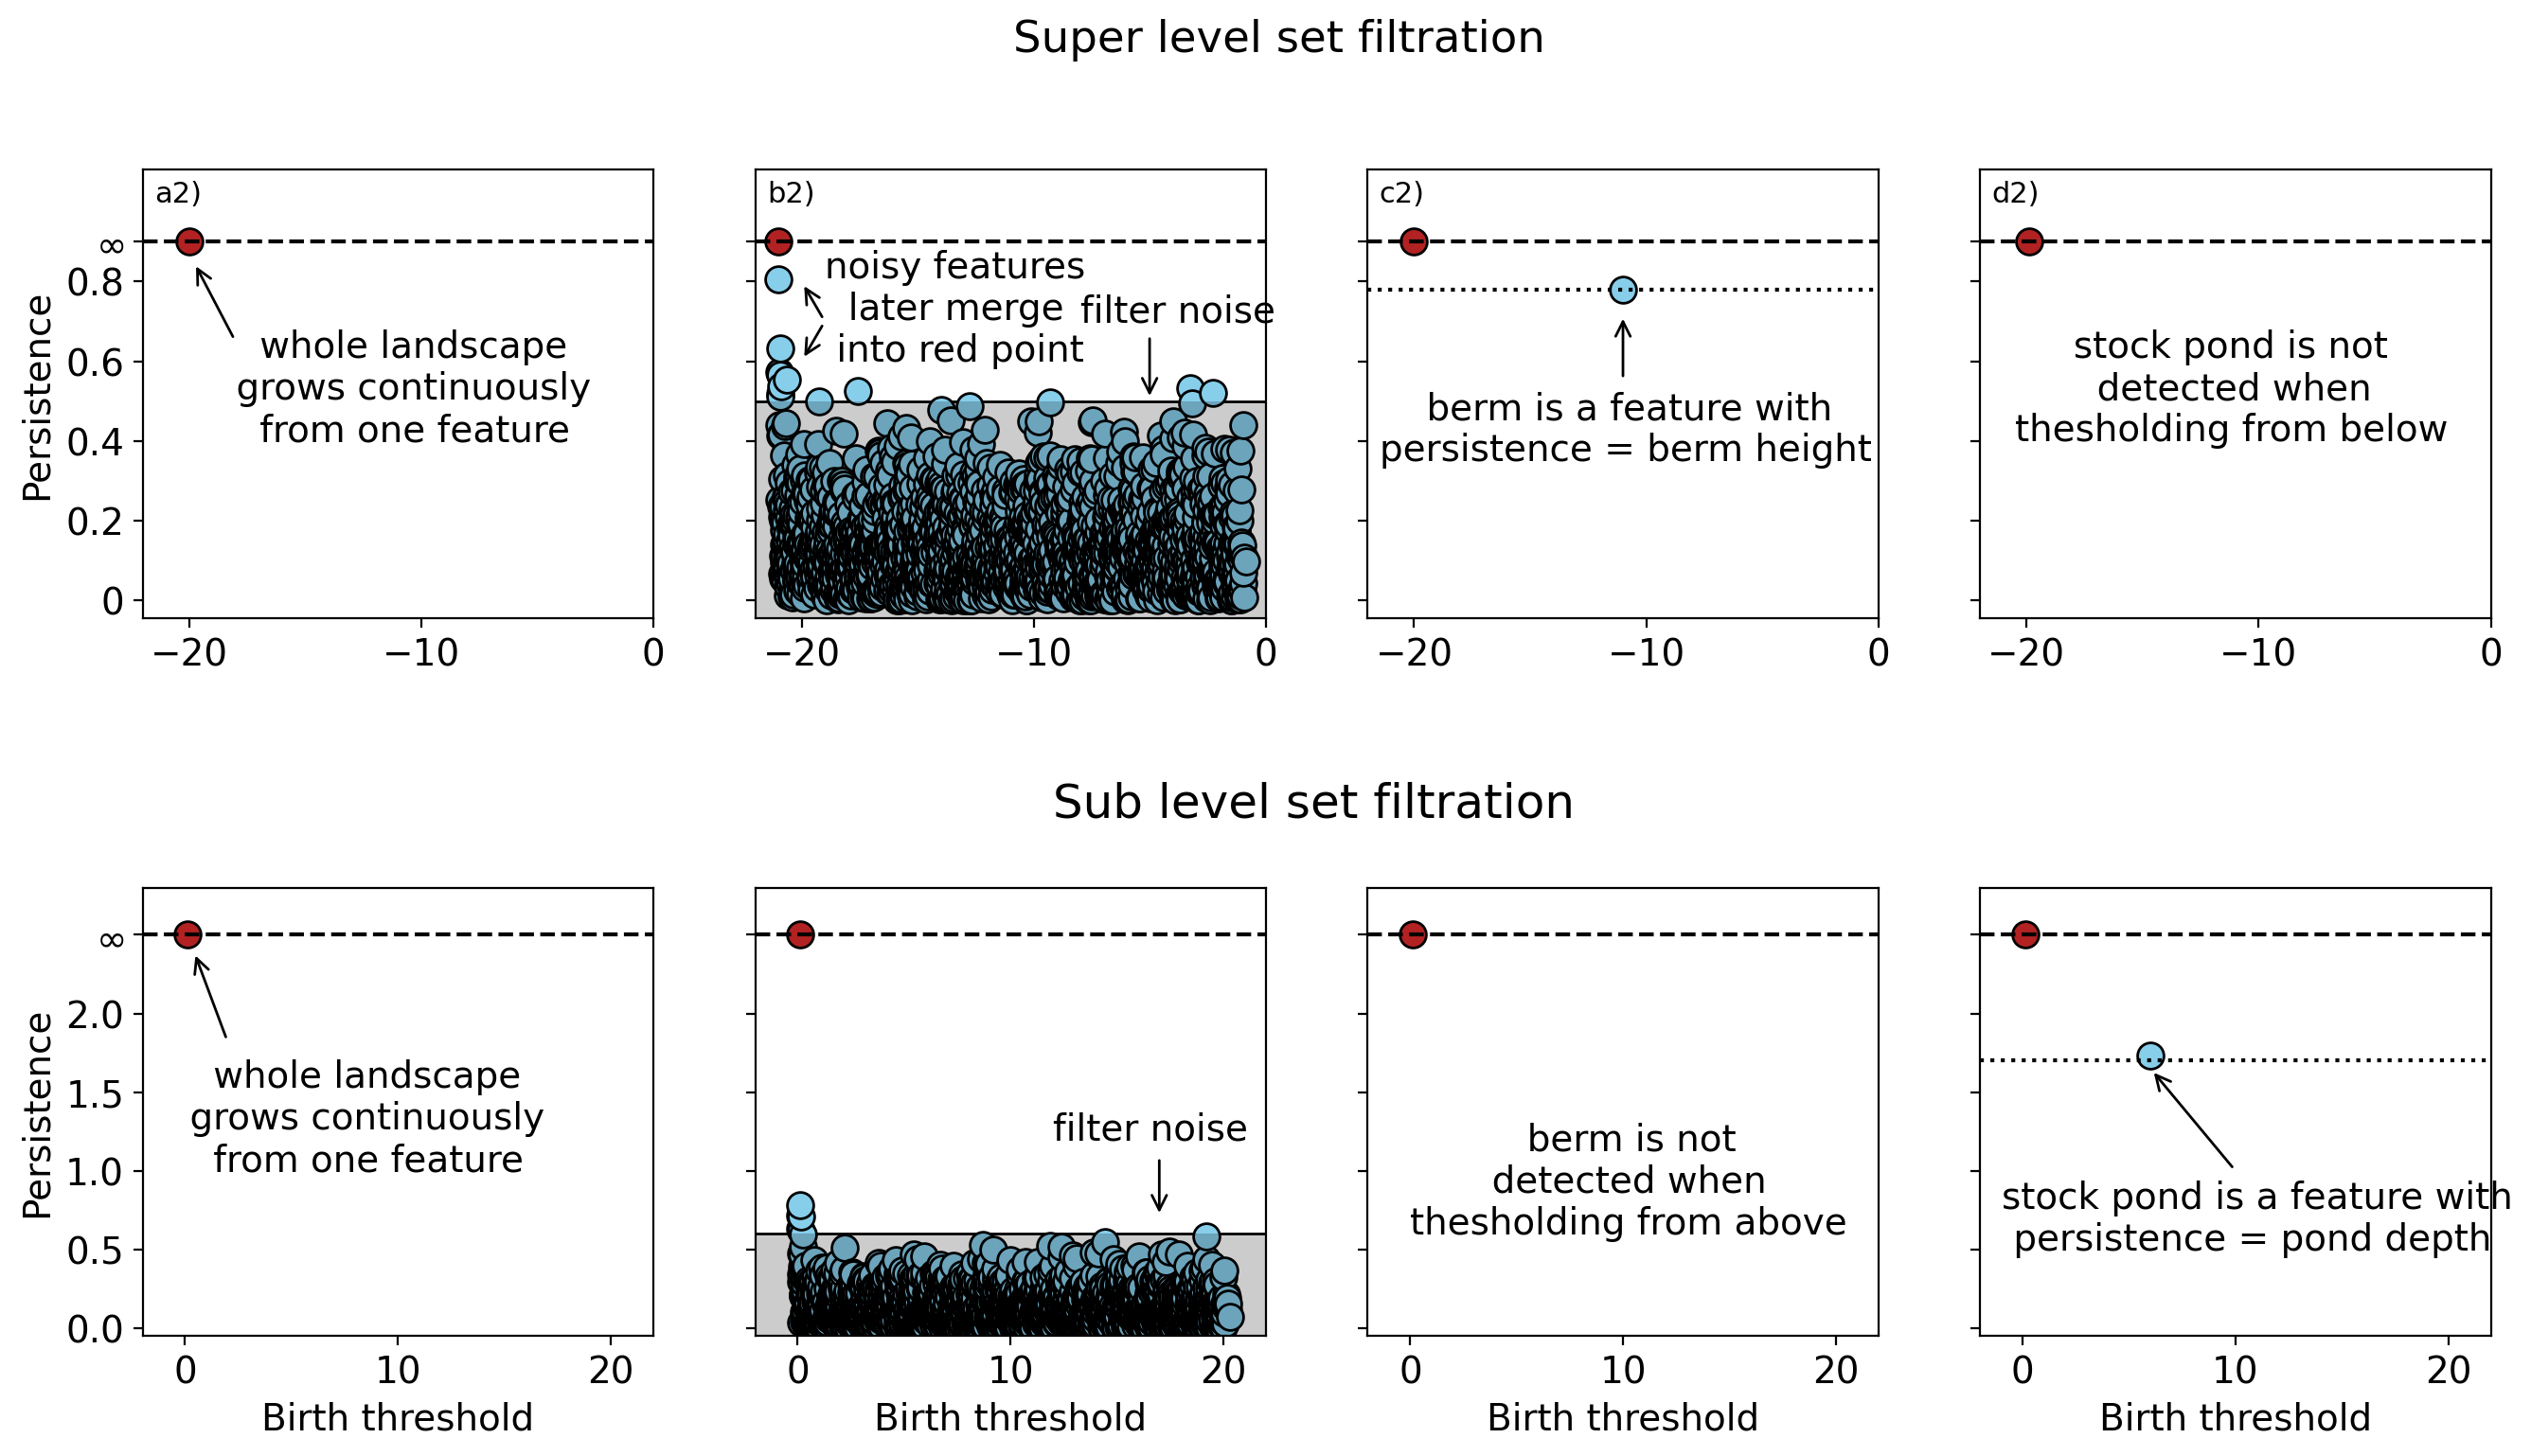

In [7]:
fig, axs = plt.subplots(2,len(data.keys()),figsize = (4*len(data.keys()),8),
                        # sharey=True
                        )

def plot_ph_rotate(dgm,minalldata,maxalldata,maxp,ax,s,c):
  minalldata = abs(minalldata)
  maxalldata = abs(maxalldata)
  minplot = minalldata#+0.25*maxalldata
  maxplot = -maxalldata*1.1
  birthtimes = np.array([p[0] for p in dgm])
  persistence = np.array([(p[1]-p[0])/2*3**0.5 for p in dgm])
  ax.scatter(birthtimes,persistence,s=s,c=c,edgecolor = 'k')
  ax.axhline(maxp,c='k',ls='--')
  ax.set_xlim(maxplot,minplot)
  ax.set_ylim(-maxp*0.05,maxp*1.2)
  ax.set_xlabel('Birth threshold')
  deathinf = birthtimes[persistence > maxalldata*2]
  ax.scatter(deathinf,[maxp]*len(deathinf),
             s=s,c='firebrick',edgecolor = 'k')



for i in range(len(dgms.keys())):
  ax = axs[0,i]
  plot_ph_rotate(dgms[i+1],0,20,0.9,ax,100,'skyblue')
  # ax.set_xticks([-20,-15,-10,-5,0,])
  ax.set_yticks([0,0.2,0.4,0.6,0.8,0.9])
  # ax.set_xticklabels(['20','15','10','5','0'])
  ax.set_yticklabels([0,0.2,0.4,0.6,0.8,r"$\infty$"])
  ax.text(-21.5,1,textlabel[i]+'2)',fontsize=11,)
  ax.set_xlabel('')
  if i>0:
    ax.set_yticklabels([])

  ax = axs[1,i]
  plot_ph_rotate(dgms_sub[i+1],0,20,2.5,ax,100,'skyblue')
  ax.set_xlim(-2,22)
  ax.set_ylim(-.05,2.8)
  ax.set_yticks([0,0.5,1,1.5,2,2.5])
  ax.set_yticklabels([0.0,0.5,1.0,1.5,2.0,r"$\infty$"])
  # ax.text(-21.5,1,textlabel[i]+'2)',fontsize=11,)
  if i>0:
    ax.set_yticklabels([])


ax = axs[0,1]
ax.axhspan(-1,0.5,facecolor = 'k',alpha = 0.2,)#zorder = -1)
ax.axhline(0.5,c='k',lw=1,zorder= -1)
ax.text(-8,0.7,'filter noise')
ax.annotate("", xy=(-5,.5), xytext=(-5,.67),
            arrowprops=dict(arrowstyle="->"))
ax.text(-19,0.6,'noisy features\n  later merge\n into red point')
ax.annotate("", xy=(-20.,0.6), xytext=(-19,0.7),
            arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(-20,0.8), xytext=(-19,0.7),
            arrowprops=dict(arrowstyle="->"))

ax = axs[1,1]
ax.axhspan(-1,0.6,facecolor = 'k',alpha = 0.2,)#zorder = -1)
ax.axhline(0.6,c='k',lw=1,zorder= -1)
ax.text(12,1.2,'filter noise')
ax.annotate("", xy=(17,.7), xytext=(17,1.1),
            arrowprops=dict(arrowstyle="->"))
# ax.text(-19,0.6,'noisy features\n  later merge\n into red point')
# ax.annotate("", xy=(-20.,0.6), xytext=(-19,0.7),
#             arrowprops=dict(arrowstyle="->"))
# ax.annotate("", xy=(-20,0.8), xytext=(-19,0.7),
#             arrowprops=dict(arrowstyle="->"))

ax = axs[0,0]
ax.set_ylabel('Persistence')
ax.text(-20,0.4,'      whole landscape\n    grows continuously\n      from one feature')
ax.annotate("", xy=(-19.8,0.85), xytext=(-18,0.65),
            arrowprops=dict(arrowstyle="->"))

ax = axs[1,0]
ax.set_ylabel('Persistence')
ax.text(-2,1,'      whole landscape\n    grows continuously\n      from one feature')
ax.annotate("", xy=(0.4,2.4), xytext=(2,1.82),
            arrowprops=dict(arrowstyle="->"))

ax = axs[0,3]
ax.text(-20.5,0.4,'     stock pond is not\n       detected when\nthesholding from below')

ax = axs[1,2]
ax.text(0,0.6,'          berm is not\n       detected when\nthesholding from above')

ax = axs[0,2]
ax.axhline(0.78,c='k',ls=':')
ax.text(-21.5,0.35,'    berm is a feature with\npersistence = berm height')
ax.annotate("", xy=(-11,0.72), xytext=(-11,0.55),
            arrowprops=dict(arrowstyle="->"))

ax = axs[1,3]
ax.axhline(1.7,c='k',ls=':')
ax.text(-1,0.5,'stock pond is a feature with\n persistence = pond depth')
ax.annotate("", xy=(6,1.65), xytext=(10,1),
            arrowprops=dict(arrowstyle="->"))

plt.subplots_adjust(hspace=0.6,)
fig.suptitle('Super level set filtration')
axs[1,1].text(12,3.25,'Sub level set filtration',fontsize = 18)

Final figure

In [19]:
data[3][100][50],data[1][100][50]

(11.0, 10.0)

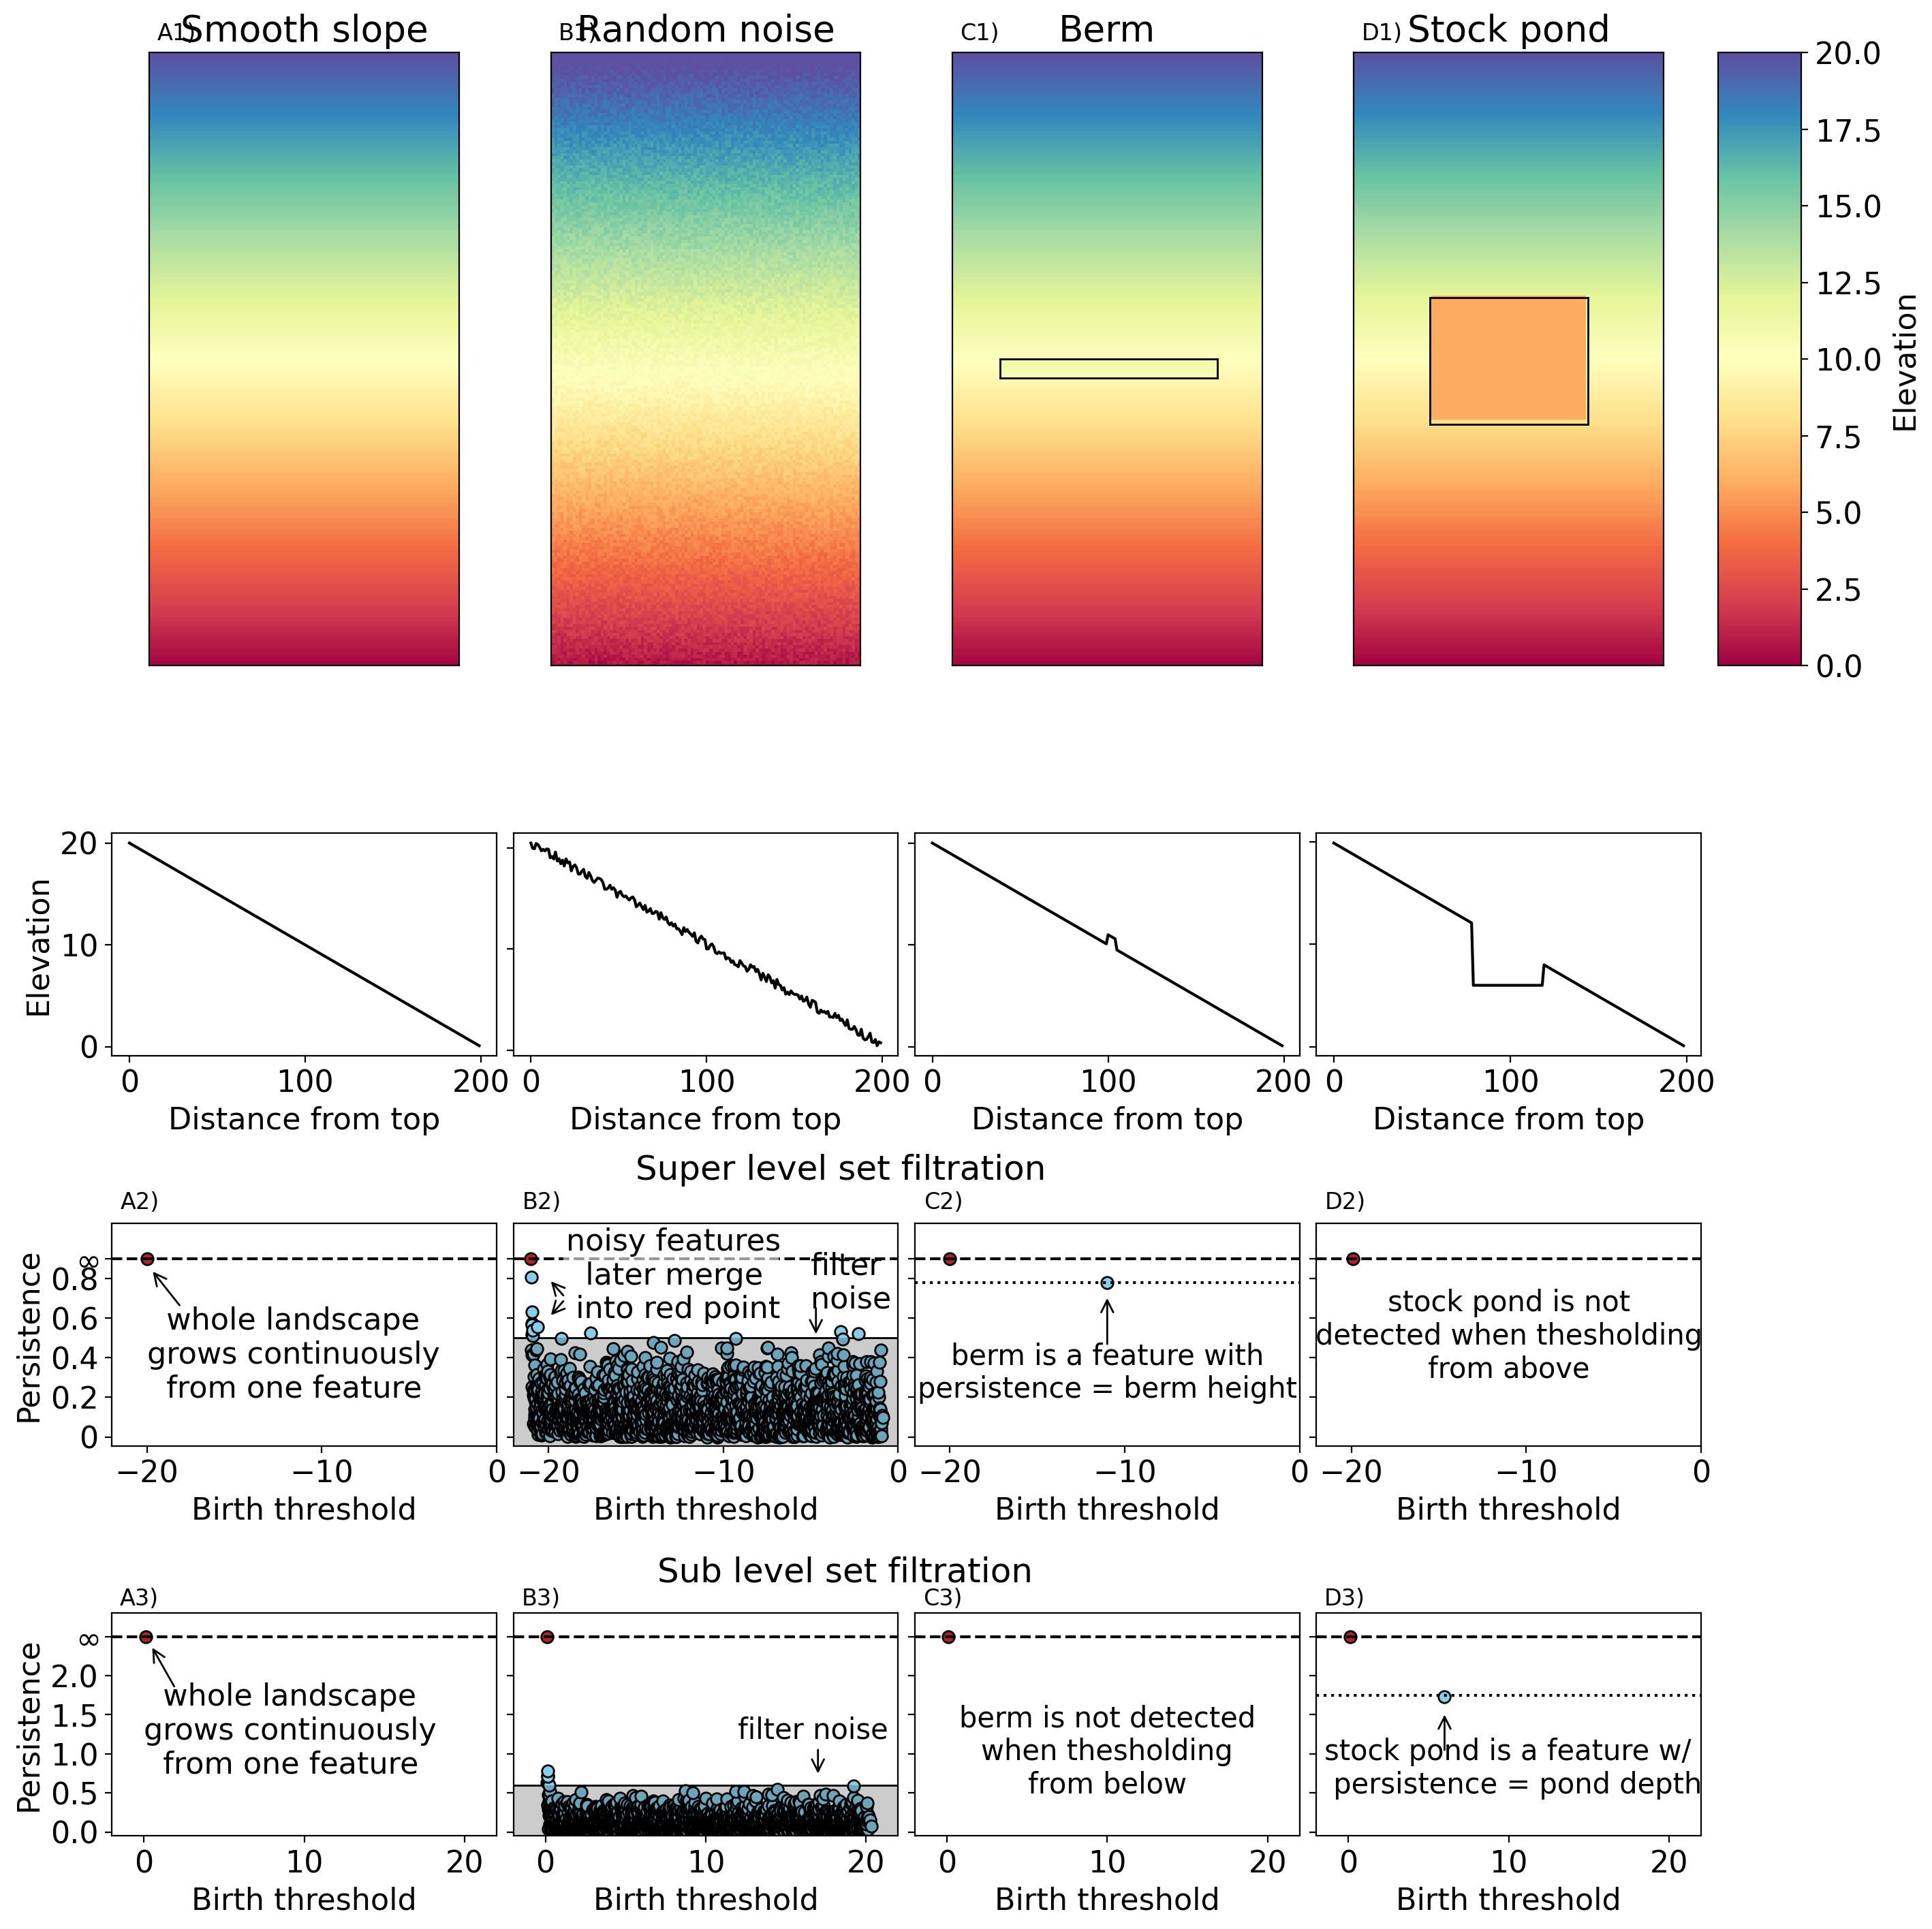

In [24]:
# fig,axs = plt.subplots(2,len(data.keys()),
#                        figsize = (4*len(data.keys()),8))#,sharey=True)

plt.rcParams.update({'font.size': 16})
dotsize = 40

import matplotlib.gridspec as gridspec
fig2 = plt.figure(figsize = (4*len(data.keys()),17))
spec2 = gridspec.GridSpec(ncols=len(data.keys())*4+1, nrows=5, figure=fig2)
ax0 = fig2.add_subplot(spec2[:2, 0:4])
ax1 = fig2.add_subplot(spec2[:2, 4:8])
ax2 = fig2.add_subplot(spec2[:2, 8:12])
ax3 = fig2.add_subplot(spec2[:2, 12:16])
ax4 = fig2.add_subplot(spec2[3, 0:4])
ax5 = fig2.add_subplot(spec2[3, 4:8])
ax6 = fig2.add_subplot(spec2[3, 8:12])
ax7 = fig2.add_subplot(spec2[3, 12:16])
ax8 = fig2.add_subplot(spec2[4, 0:4])
ax9 = fig2.add_subplot(spec2[4, 4:8])
ax10 = fig2.add_subplot(spec2[4, 8:12])
ax11 = fig2.add_subplot(spec2[4, 12:16])
cax = fig2.add_subplot(spec2[:2, 16])
p1 = fig2.add_subplot(spec2[2, 0:4])
p2 = fig2.add_subplot(spec2[2, 4:8])
p3 = fig2.add_subplot(spec2[2, 8:12])
p4 = fig2.add_subplot(spec2[2, 12:16])

axs = [[ax0,ax1,ax2,ax3],
       [p1,p2,p3,p4],
       [ax4,ax5,ax6,ax7],
       [ax8,ax9,ax10,ax11]]

textlabel = ['A','B','C','D','E']
for i in range(len(data.keys())):
  ax = axs[0][i]
  d = data[i+1]
  im = ax.imshow(d,vmin = 0,vmax = 20,cmap='Spectral')
  ax.set_title(example_names[i+1])
  ax.set_ylim(198,0)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.text(2,-4,textlabel[i]+'1)',fontsize=12,c='k')

ax = axs[0][2]
lw=1
ax.plot([15,85],[99,99],c='k',lw=lw)
ax.plot([15,85],[105,105],c='k',lw=lw)
ax.plot([15,15],[99,105],c='k',lw=lw)
ax.plot([85,85],[99,105],c='k',lw=lw)

ax = axs[0][3]
ax.plot([24,75],[79,79],c='k',lw=lw)
ax.plot([24,75],[120,120],c='k',lw=lw)
ax.plot([24,24],[79,120],c='k',lw=lw)
ax.plot([75,75],[79,120],c='k',lw=lw)

cbar = fig.colorbar(im, cax=cax)
cbar.set_label('Elevation',fontsize=16)

########################################

for i in range(len(dgms.keys())):
  ax = axs[1][i]
  profile = [data[i+1][k][50] for k in range(len(data[i+1]))]
  ax.plot(profile,c='k')
  if i>0:
    ax.set_yticklabels([])
  else:
    ax.set_ylabel('Elevation')
  ax.set_xlabel('Distance from top')


for i in range(len(dgms.keys())):
  ax = axs[2][i]
  plot_ph_rotate(dgms[i+1],0,20,0.9,ax,dotsize,'skyblue')
  # ax.set_xticks([-20,-15,-10,-5,0,])
  ax.set_yticks([0,0.2,0.4,0.6,0.8,0.9])
  # ax.set_xticklabels(['20','15','10','5','0'])
  ax.set_yticklabels([0,0.2,0.4,0.6,0.8,r"$\infty$"])
  ax.text(-21.5,1.15,textlabel[i]+'2)',fontsize=12,)
  if i>0:
    ax.set_yticklabels([])
  ax.set_xlabel('Birth threshold')

  ax = axs[3][i]
  plot_ph_rotate(dgms_sub[i+1],0,20,2.5,ax,dotsize,'skyblue')
  ax.set_xlim(-2,22)
  ax.set_ylim(-.05,2.8)
  ax.set_yticks([0,0.5,1,1.5,2,2.5])
  ax.set_yticklabels([0.0,0.5,1.0,1.5,2.0,r"$\infty$"])
  ax.text(-1.5,2.9,textlabel[i]+'3)',fontsize=12,)
  if i>0:
    ax.set_yticklabels([])


ax = axs[2][1]
ax.axhspan(-1,0.5,facecolor = 'k',alpha = 0.2,)#zorder = -1)
ax.axhline(0.5,c='k',lw=1,zorder= -1)
ax.text(-5,0.65,'filter\nnoise')
ax.annotate("", xy=(-4.7,.5), xytext=(-4.7,.67),
            arrowprops=dict(arrowstyle="->"))
ax.text(-19,0.6,'noisy features\n  later merge\n into red point')
ax.plot([-7,-19],[.9,.9],c='white',lw=3,alpha=0.6)
ax.annotate("", xy=(-20.,0.6), xytext=(-19,0.7),
            arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(-20,0.8), xytext=(-19,0.7),
            arrowprops=dict(arrowstyle="->"))

ax = axs[2][0]
ax.set_ylabel('Persistence',fontsize = 16)
ax.text(-20,0.2,'  whole landscape\ngrows continuously\n  from one feature')
ax.annotate("", xy=(-19.8,0.85), xytext=(-18,0.65),
            arrowprops=dict(arrowstyle="->"))

ax = axs[3][0]
ax.set_ylabel('Persistence',)
ax.text(0,.75,'  whole landscape\ngrows continuously\n  from one feature')
ax.annotate("", xy=(0.4,2.4), xytext=(2,1.82),
            arrowprops=dict(arrowstyle="->"))

ax = axs[2][3]
ax.text(-11,0.3,'stock pond is not\ndetected when thesholding\nfrom above',
        ha='center',fontsize = 15)

ax = axs[3][2]
ax.text(10,0.5,'berm is not detected\nwhen thesholding\nfrom below',
        ha = 'center',fontsize = 15)

ax = axs[2][2]
ax.axhline(0.78,c='k',ls=':')
ax.text(-11,0.2,'berm is a feature with\npersistence = berm height',
        ha = 'center',fontsize = 15)
ax.annotate("", xy=(-11,0.72), xytext=(-11,0.45),
            arrowprops=dict(arrowstyle="->"))

ax = axs[3][3]
ax.axhline(1.75,c='k',ls=':')
ax.text(-1.5,0.5,'stock pond is a feature w/\n persistence = pond depth'
        ,fontsize = 15 )
ax.annotate("", xy=(6,1.55), xytext=(6,1),
            arrowprops=dict(arrowstyle="->"))

ax = axs[3][1]
ax.axhspan(-1,0.6,facecolor = 'k',alpha = 0.2,)#zorder = -1)
ax.axhline(0.6,c='k',lw=1,zorder= -1)
ax.text(12,1.2,'filter noise',fontsize = 15)
ax.annotate("", xy=(17,.7), xytext=(17,1.1),
            arrowprops=dict(arrowstyle="->"))

axs[2][1].text(-15,1.3,'Super level set filtration',fontsize = 18)
axs[3][1].text(7,3.2,'Sub level set filtration', fontsize = 18)

plt.subplots_adjust(hspace=0.75)#,wspace = 0.5,)